**Author: Mayuri Vagh**


Data Science & Business Analytics intern at The Sparks Foundation.

TASK2 -
Prediction using Unsupervised ML

From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

In [22]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets
import seaborn as sns

In [23]:
# Load the iris dataset
Dataframe = datasets.load_iris()
Dataframe_df = pd.DataFrame(Dataframe.data, columns = Dataframe.feature_names)
print(Dataframe_df.head()) # See the first 5 rows

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


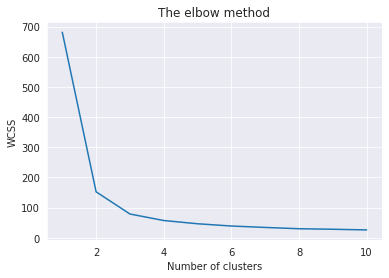

In [24]:
#DETERMINING THE OPTIMUM NUMBER OF CLUSTERS USING THE ELBOW METHOD


# Finding the optimum number of clusters for k-means classification

x = Dataframe_df.iloc[:, [0, 1, 2, 3]].values


from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans= KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
#CREATING THE KMEANS CLASSIFIER

kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

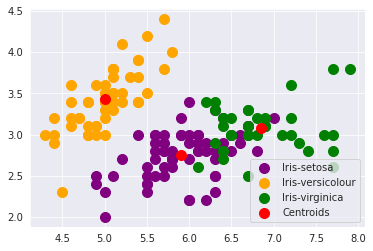

In [26]:
# PLOTING THE CLUSTERS

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [27]:
#Labeling the predictions
#considering 0 Corresponds to 'Iris-setosa'
y_kmeans = np.where(y_kmeans==0, 'Iris-setosa', y_kmeans)
y_kmeans = np.where(y_kmeans=='1', 'Iris-versicolour', y_kmeans)
y_kmeans = np.where(y_kmeans=='2', 'Iris-virginica', y_kmeans)

In [28]:
#Adding the prediction to the dataset
data_with_clusters = Dataframe_df.copy()
data_with_clusters["Cluster"] = y_kmeans
print(data_with_clusters.head(5))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

            Cluster  
0  Iris-versicolour  
1  Iris-versicolour  
2  Iris-versicolour  
3  Iris-versicolour  
4  Iris-versicolour  


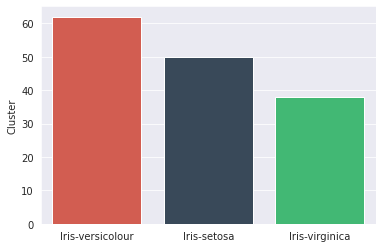

In [29]:
# BARPLOT- CLUSTER DISTRIBUTION
# Bar plot
sns.set_style('darkgrid')
sns.barplot(x = data_with_clusters["Cluster"] .unique(),
            y = data_with_clusters["Cluster"] .value_counts(),
            palette=sns.color_palette(["#e74c3c", "#34495e", "#2ecc71"]));